# Imports

In [1]:
import os
import logging
import pandas as pd
import datetime
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [2]:
pt3s_path = os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))

# Logging

In [3]:
logger = logging.getLogger()  

logFileName= r"Example2.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Model

In [4]:
name="WDBeispiel_Wasser_STAND9"

In [5]:
rootdir=pt3s_path+r"\Examples\WDBeispiel_Wasser_STAND9"

# Read Results

In [6]:
mx=dxAndMxHelperFcts.readMx(rootdir=rootdir)

INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDBeispiel_Wasser_STAND9\B1\V0\BZ1\M-1-0-1.2.MXS reading ...


In [7]:
df=mx.df

# Plot

## Define Axes

In [8]:
def fyP(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('Druck in bar')
    ax.set_ylim(0,12)
    ax.set_yticks(sorted(np.append(np.linspace(0,12,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyQ(ax,offset=60):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('Volumenstrom in m3/h')
    ax.set_ylim(0,48)
    ax.set_yticks(sorted(np.append(np.linspace(0,48,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyRSK(ax,offset=120):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('RSK-Stellung in %')
    ax.set_ylim(0,60)
    ax.set_yticks(sorted(np.append(np.linspace(0,60,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

## Non-interactive Plot

In [9]:
def plot():
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #Druck
    ax1 = ax0.twinx()     
    fyP(ax1) 
    ax1.plot(df.index, df['KNOT~K0011~~5471942051669438823~PH'], color='red', label='PH K0011')
    ax1.plot(df.index, df['KNOT~5143521_i~~5166327497394449628~PH'], color='darkgreen', label='PH 5143521_i')
    ax1.plot(df.index, df['KNOT~791393_3_k~~5667818255300782920~PH'], color='blue', label='PH 791393_3_k')
    ax1.plot(df.index, df['KNOT~1629686_0_i~~5262999985134416180~PH'], color='yellow', label='PH 1629686_0_i')
    ax1.legend(loc='upper right')
    
    # Volumenstrom
    ax2 = ax0.twinx()     
    fyQ(ax2)
    ax2.plot(df.index, df['VENT~K0006~K0004~5659089154378919131~QM'], color='orange', label='QM K0006~K0004')
    ax2.plot(df.index, df['VENT~K0011~PST_out~5430537691154258843~QM'], color='lightgreen', label='QM K0011~PST_out')
    ax2.legend(loc='upper left')
    
    # RSK-Stellung
    ax3 = ax0.twinx() 
    fyRSK(ax3)
    ax3.plot(df.index, df['KLAP~K0013~K0014~5303247238968995258~PHI'], color='pink', label='PHI K0013~K0014')
    ax3.legend(loc='lower right')
     
    # Set the x-axis limits
    Startzeit=datetime.datetime(2020, 1, 28, 14, 45)
    Endzeit=datetime.datetime(2020, 1, 28, 14, 46)

    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=list(range(0, 61, 2)), yPos=0)

    ax0.set_title('Time Curves for '+name+' from '+Startzeit.strftime('%Y-%m-%d %H:%M:%S')+" to "+Endzeit.strftime('%Y-%m-%d %H:%M:%S'))

    #Create printable Output
    plt.savefig('Example2_Output.pdf', format='pdf', dpi=300)
    plt.savefig('Example2_Output.png', format='png', dpi=300)
    
    plt.show()

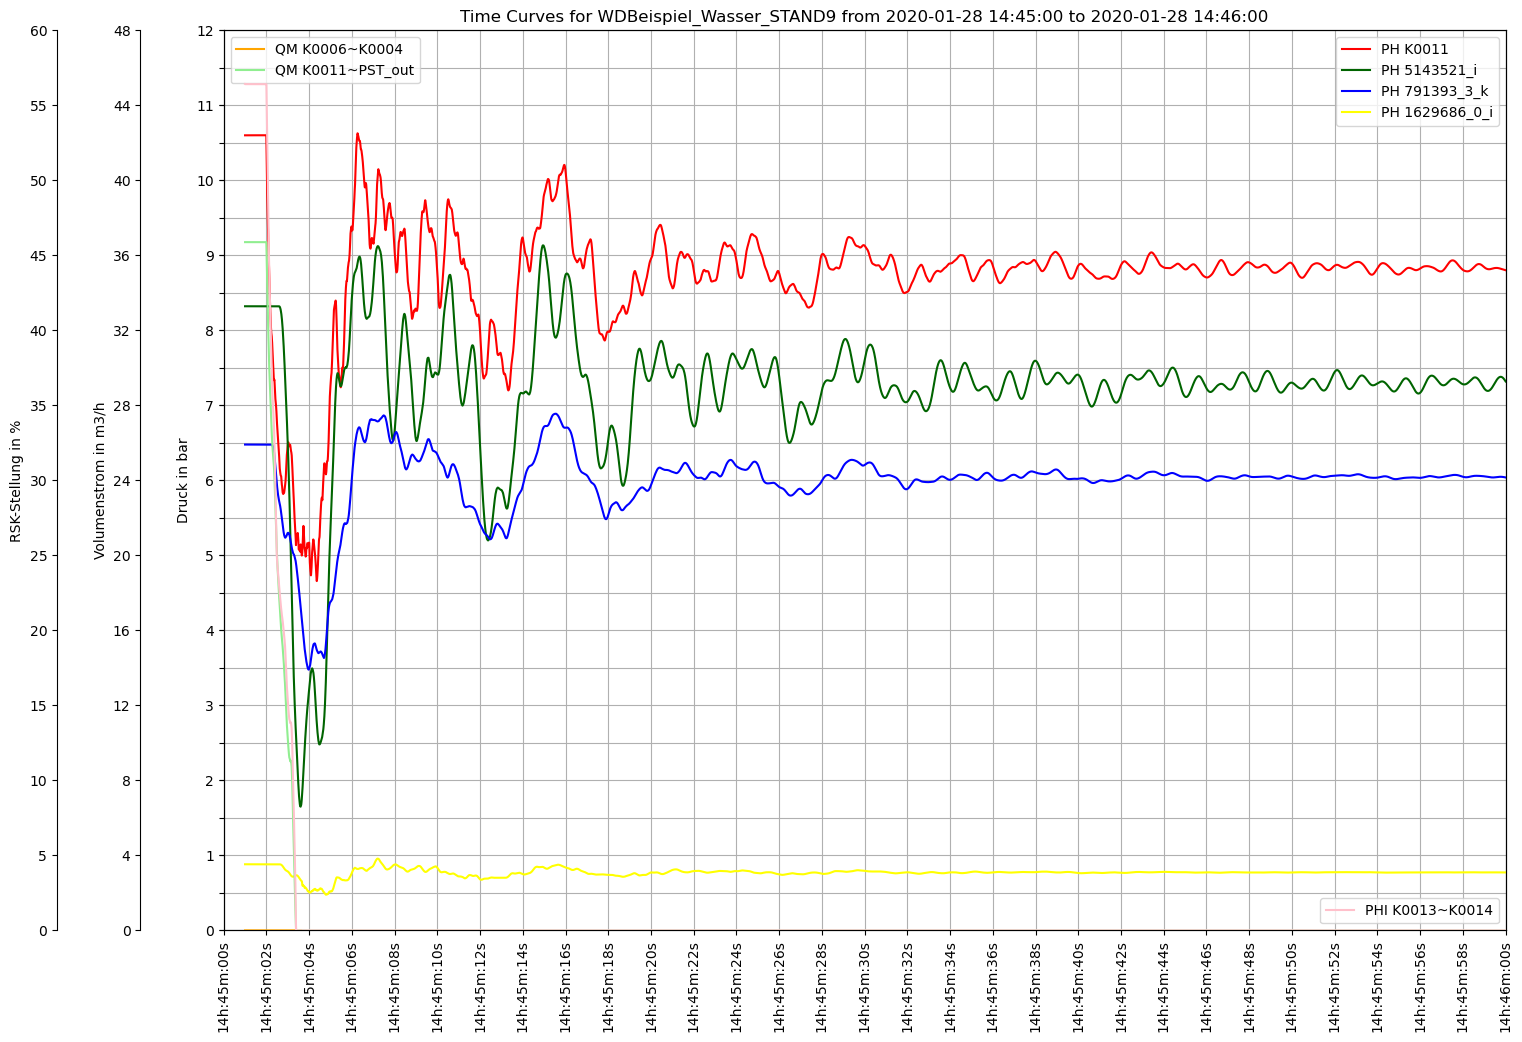

In [10]:
plot()

## Interactive Plot

### Using Widgets

In [11]:
Startzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 45),
    description='Startzeit:'
)

Endzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 46),
    description='Endzeit:'
)

Druck = widgets.Checkbox(value=1,description='Druck')
Volumenstrom = widgets.Checkbox(value=1,description='Volumenstrom')
RSK_Stellung = widgets.Checkbox(value=1,description='RSK-Stellung')

In [12]:
def interactive_plot(Startzeit, Endzeit, Druck, Volumenstrom, RSK_Stellung):
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    i=0
    
    if Druck == True:
        i+=1
        ax1 = ax0.twinx()     
        fyP(ax1, (i-1)*60)
                
        ax1.plot(df.index, df['KNOT~K0011~~5471942051669438823~PH'], color='red', label='PH K0011')
        ax1.plot(df.index, df['KNOT~5143521_i~~5166327497394449628~PH'], color='darkgreen', label='PH 5143521_i')
        ax1.plot(df.index, df['KNOT~791393_3_k~~5667818255300782920~PH'], color='blue', label='PH 791393_3_k')
        ax1.plot(df.index, df['KNOT~1629686_0_i~~5262999985134416180~PH'], color='yellow', label='PH 1629686_0_i')
        ax1.legend(loc='upper right')
            
    if Volumenstrom == True:
        i+=1
        ax2 = ax0.twinx()     
        fyQ(ax2, (i-1)*60)
        ax2.plot(df.index, df['VENT~K0006~K0004~5659089154378919131~QM'], color='orange', label='QM K0006~K0004')
        ax2.plot(df.index, df['VENT~K0011~PST_out~5430537691154258843~QM'], color='lightgreen', label='QM K0011~PST_out')
        ax2.legend(loc='upper left')
        
    if RSK_Stellung == True:
        i+=1
        ax3 = ax0.twinx()     
        fyRSK(ax3, (i-1)*60)
        ax3.plot(df.index, df['KLAP~K0013~K0014~5303247238968995258~PHI'], color='pink', label='PHI K0013~K0014')
        ax3.legend(loc='lower right')
        
    # Set the x-axis limits
    Startzeit=datetime.datetime.combine(datetime.date(2020, 1, 28), Startzeit_widget.value)
    Endzeit=datetime.datetime.combine(datetime.date(2020, 1, 28), Endzeit_widget.value)


    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=list(range(0, 61, 2)), yPos=0)

    ax0.set_title('Time Curves for '+name+' from '+Startzeit.strftime('%Y-%m-%d %H:%M:%S')+" to "+Endzeit.strftime('%Y-%m-%d %H:%M:%S'))
    
    plt.show()

In [13]:
widgets_interact = widgets.interactive(interactive_plot,
                                       Startzeit=Startzeit_widget, 
                                       Endzeit=Endzeit_widget,
                                       Druck=Druck,
                                       Volumenstrom=Volumenstrom,
                                       RSK_Stellung=RSK_Stellung)

In [14]:
def update_plot(change):
    plt.clf()
    interactive_plot(Druck=Druck.value, Volumenstrom=Volumenstrom.value, RSK_Stellung=RSK_Stellung.value,
                       Startzeit=Startzeit.value, Endzeit=Endzeit.value)

Startzeit_widget.observe(update_plot, names='value')
Endzeit_widget.observe(update_plot, names='value')
Druck.observe(update_plot, names='value')
Volumenstrom.observe(update_plot, names='value')
RSK_Stellung.observe(update_plot, names='value')

In [15]:
display(widgets_interact) 

interactive(children=(TimePicker(value=datetime.time(14, 45), description='Startzeit:', step=60.0), TimePicker…

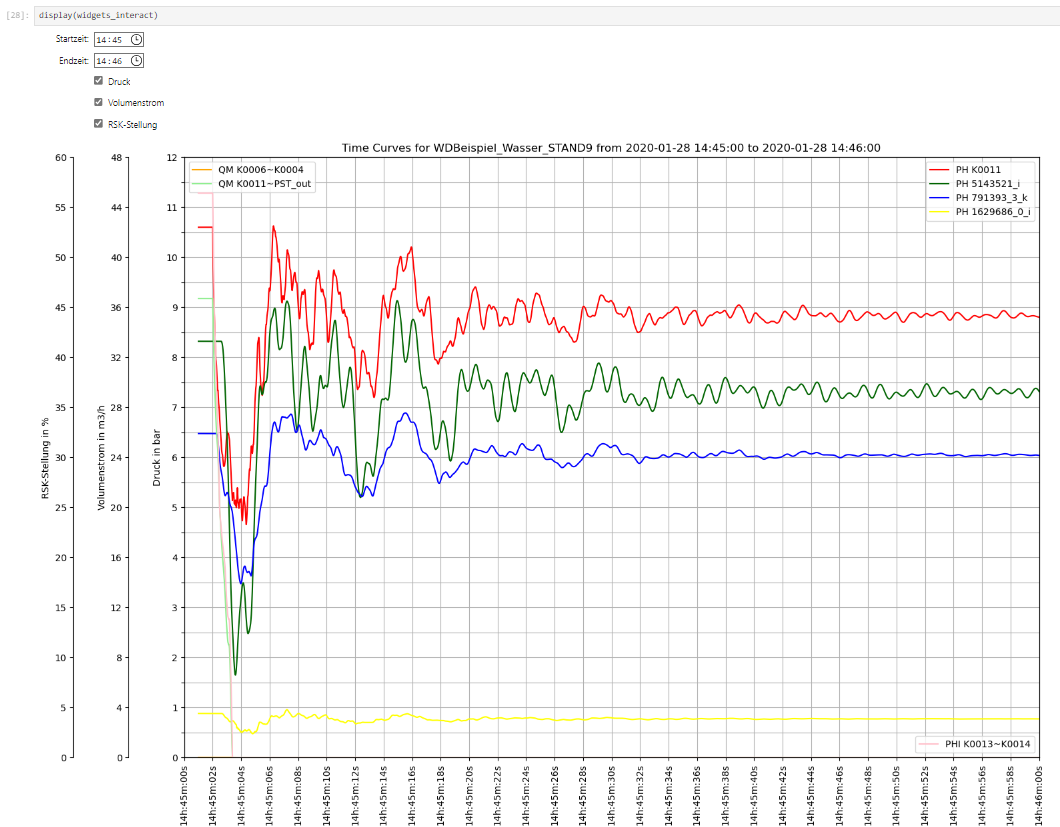

In [16]:
Image(filename=pt3s_path+r"\Examples\Images\1_example2_interactive_widget_plot.png") 

### Using Bokeh

In [17]:
def plot_data(plot_druck=True, plot_volumenstrom=True, plot_rsk_stellung=True):
    
    source = ColumnDataSource(df)

    # List of columns to plot
    cols_to_plot = ['KNOT~K0011~~5471942051669438823~PH', 'KNOT~5143521_i~~5166327497394449628~PH', 'KNOT~791393_3_k~~5667818255300782920~PH', 'KNOT~1629686_0_i~~5262999985134416180~PH'] if plot_druck else []
    cols_to_plot_2 = ['VENT~K0006~K0004~5659089154378919131~QM', 'VENT~K0011~PST_out~5430537691154258843~QM'] if plot_volumenstrom else []
    cols_to_plot_3 = ['KLAP~K0013~K0014~5303247238968995258~PHI'] if plot_rsk_stellung else []

    # Define the plot size
    p = figure(width=1366, height=768, x_axis_type="datetime", y_range=(0, 12))

    # Adding a line for each column to the plot
    for i, col in enumerate(cols_to_plot):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i], alpha=0.8, legend_label=col)

    # Add a label to the y axis
    p.yaxis.axis_label = 'Druck in bar' if plot_druck else ''

    # Create a new y range for the second set of columns
    p.extra_y_ranges = {"Volumenstrom in m^3/h": Range1d(start=0, end=40) if plot_volumenstrom else Range1d(start=0, end=1),  # Adjust the range according to your data
                        "RSK-Stellung in %": Range1d(start=0, end=60) if plot_rsk_stellung else Range1d(start=0, end=1)}  # Adjust the range according to your data

    # Adding a line for each column in the second set to the plot with the new y range
    for i, col in enumerate(cols_to_plot_2):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i + len(cols_to_plot)], alpha=0.8, legend_label=col, y_range_name="Volumenstrom in m^3/h")

    # Adding a line for each column in the third set to the plot with the new y range
    for i, col in enumerate(cols_to_plot_3):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i + len(cols_to_plot) + len(cols_to_plot_2)], alpha=0.8, legend_label=col, y_range_name="RSK-Stellung in %")

    # Add a second y axis to the left that corresponds to the new y range
    if plot_volumenstrom:
        p.add_layout(LinearAxis(y_range_name="Volumenstrom in m^3/h", axis_label='Volumenstrom in m^3/h'), 'left')
    if plot_rsk_stellung:
        p.add_layout(LinearAxis(y_range_name="RSK-Stellung in %", axis_label='RSK-Stellung in %'), 'left')

    # Show the plot
    show(p)

In [18]:
plot_data(plot_druck=True
          ,plot_volumenstrom=True
          ,plot_rsk_stellung=True)

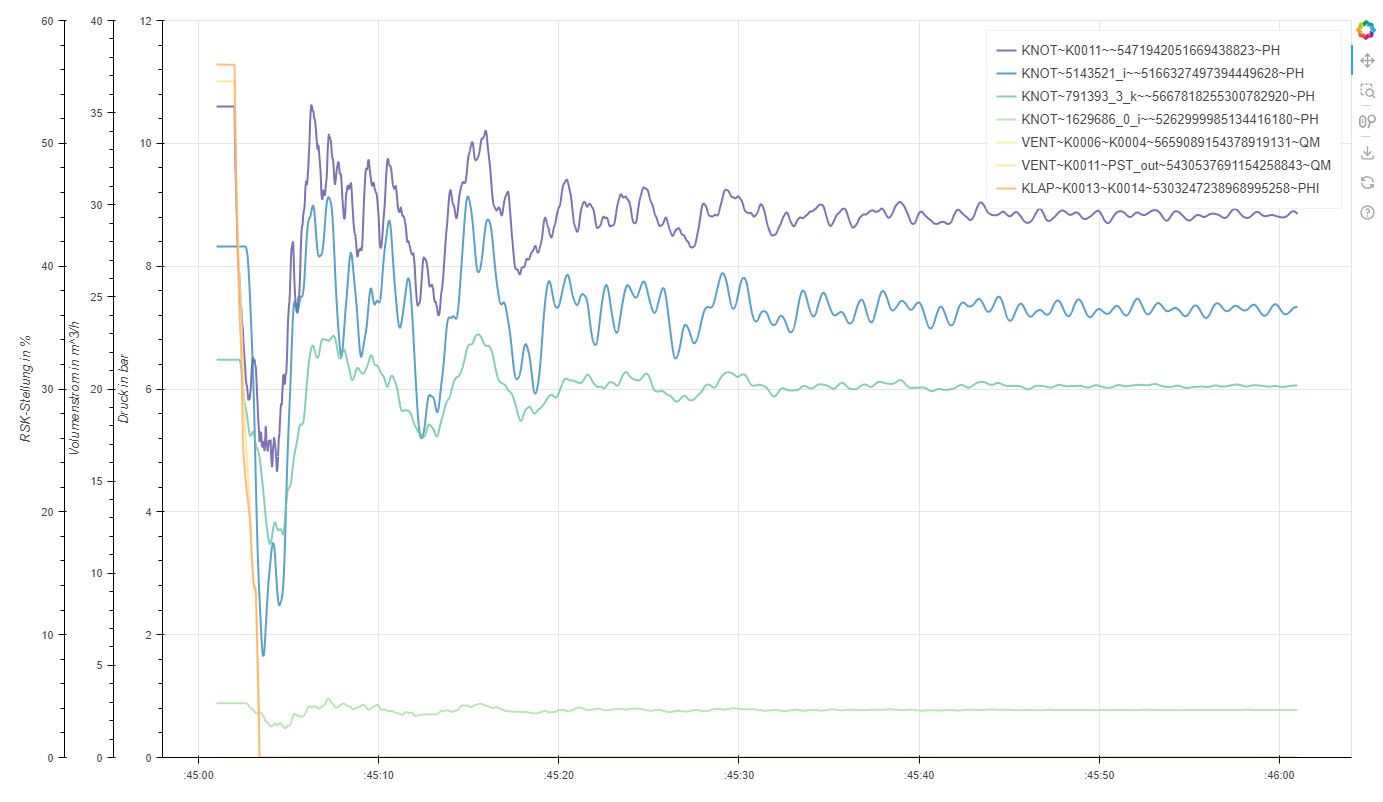

In [19]:
Image(filename=pt3s_path+r"\Examples\Images\2_example2_interactive_bokeh_plot.png") 